In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [2]:
# read multiple csv from data folder
files = []
for file in os.listdir('data'):
    if file.endswith('.csv'):
        files.append(file)
print(files)

['Weather_Data_Germany.csv', 'Prices_Europe.csv', 'Realised_Supply_Germany.csv', 'Installed_Capacity_Germany.csv', 'Reaslised_Demand_Germany.csv']


In [3]:
df = pd.read_csv('data/' + files[0])

In [4]:
# Calculate midpoints
mid_latitude = df['latitude'].mean()
mid_longitude = df['longitude'].mean()

def categorize_location(row):
    if row['latitude'] >= mid_latitude and row['longitude'] <= mid_longitude:
        return 'top_left'
    elif row['latitude'] >= mid_latitude and row['longitude'] > mid_longitude:
        return 'top_right'
    elif row['latitude'] < mid_latitude and row['longitude'] <= mid_longitude:
        return 'bottom_left'
    else:
        return 'bottom_right'

# Apply the function to create the new 'location' column
df['location'] = df.apply(categorize_location, axis=1)
df['location']




0              top_left
1              top_left
2              top_left
3              top_left
4           bottom_left
               ...     
2104315       top_right
2104316    bottom_right
2104317    bottom_right
2104318    bottom_right
2104319    bottom_right
Name: location, Length: 2104320, dtype: object

/Users/okancoskun/anaconda3/envs/my_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


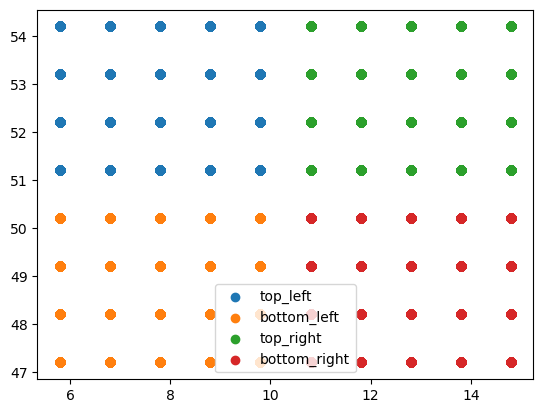

In [5]:
# plot each location seperately
fig, ax = plt.subplots()
for i in df['location'].unique():
    temp_df = df[df['location'] == i]
    ax.scatter(temp_df['longitude'], temp_df['latitude'], label=i)
ax.legend()
plt.show()